In [4]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [3]:
data =  pd.read_csv("E:\RPI Courses And Stuff\Courses\Data Analytics\PROJECT\Data.csv")
data.head()

Unnamed: 0                                              Rowid  Year  \
0           0                2019~11~JOB01~JOB~DISTYPE~SELFDIS~~  2019   
1           1                 2019~11~JOB02~JOB~DISTYPE~MOBDIS~~  2019   
2           2  2019~11~PAGUIDE02~PAGUIDE~DISSTAT~DISABL~SEX~GENF  2019   
3           3         2019~11~EDUCATE01~EDUCATE~DISTYPE~INDDIS~~  2019   
4           4     2019~11~YESNO02~HEALTH~DISSTAT~DISABL~SEX~GENM  2019   

  LocationAbbr          LocationDesc DataSource                   Category  \
0           DC  district of columbia      BRFSS               Demographics   
1           DC  district of columbia      BRFSS               Demographics   
2           DC  district of columbia      BRFSS   Health Risks & Behaviors   
3           DC  district of columbia      BRFSS               Demographics   
4           DC  district of columbia      BRFSS  General Health Conditions   

                                           Indicator  \
0  Employment status among adults 18 years of age...   
1  Employment status among adults 18 years of age...   
2  Meeting the physical activity guidelines among...   
3  Education level among adults 18 years of age o...   
4  Fair or poor self-rated health among adults 18...   

                   Response Data_Value_Unit  ... IndicatorID  Geolocation  \
0                  Employed               %  ...         JOB          NaN   
1               Out of Work               %  ...         JOB          NaN   
2        Meets Aerobic Only               %  ...     PAGUIDE          NaN   
3  Some High School or Less               %  ...     EDUCATE          NaN   
4                        No               %  ...      HEALTH          NaN   

   LocationID ResponseID DataValueTypeID  StratificationCategoryID1  \
0          11      JOB01      AGEADJPREV                    DISTYPE   
1          11      JOB02      AGEADJPREV                    DISTYPE   
2          11  PAGUIDE02      AGEADJPREV                    DISSTAT   
3          11  EDUCATE01      AGEADJPREV                    DISTYPE   
4          11    YESNO02      AGEADJPREV                    DISSTAT   

   StratificationID1  StratificationCategoryID2  StratificationID2  \
0            SELFDIS                        NaN                NaN   
1             MOBDIS                        NaN                NaN   
2             DISABL                        SEX               GENF   
3             INDDIS                        NaN                NaN   
4             DISABL                        SEX               GENM   

  Obesity_Value  
0         0.238  
1         0.238  
2         0.238  
3         0.238  
4         0.238  

[5 rows x 34 columns]

In [8]:
# Check the columns and their data types
print(data.info())

# Summary statistics
print(data.describe().head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520280 entries, 0 to 520279
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  520280 non-null  int64  
 1   Rowid                       423655 non-null  object 
 2   Year                        520280 non-null  int64  
 3   LocationAbbr                520280 non-null  object 
 4   LocationDesc                520280 non-null  object 
 5   DataSource                  520280 non-null  object 
 6   Category                    520280 non-null  object 
 7   Indicator                   520280 non-null  object 
 8   Response                    512840 non-null  object 
 9   Data_Value_Unit             520280 non-null  object 
 10  Data_Value_Type             520280 non-null  object 
 11  Data_Value                  460758 non-null  float64
 12  Data_Value_Alt              460758 non-null  float64
 13  Data_Value_Foo

# Visualize Relationships Based on Disability Types

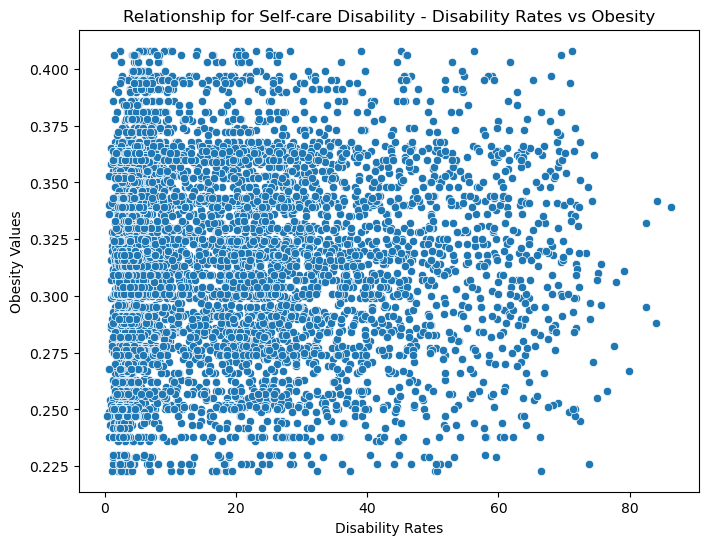

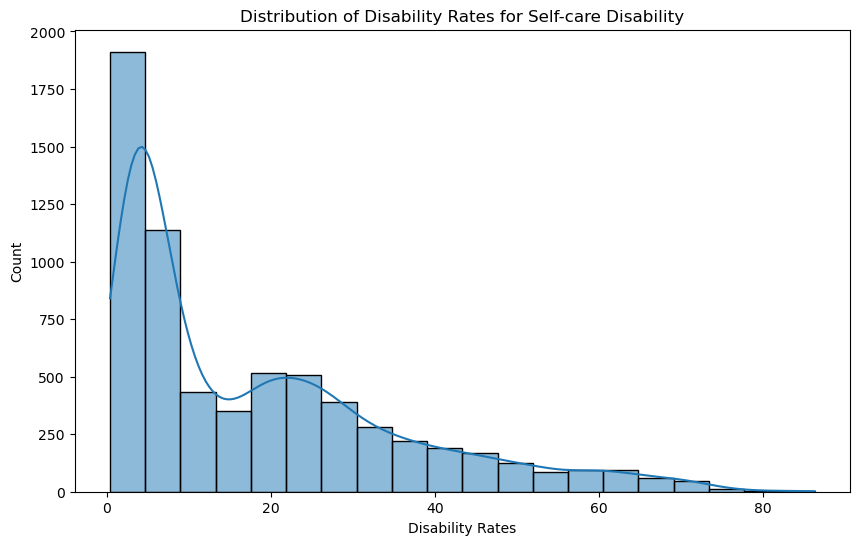

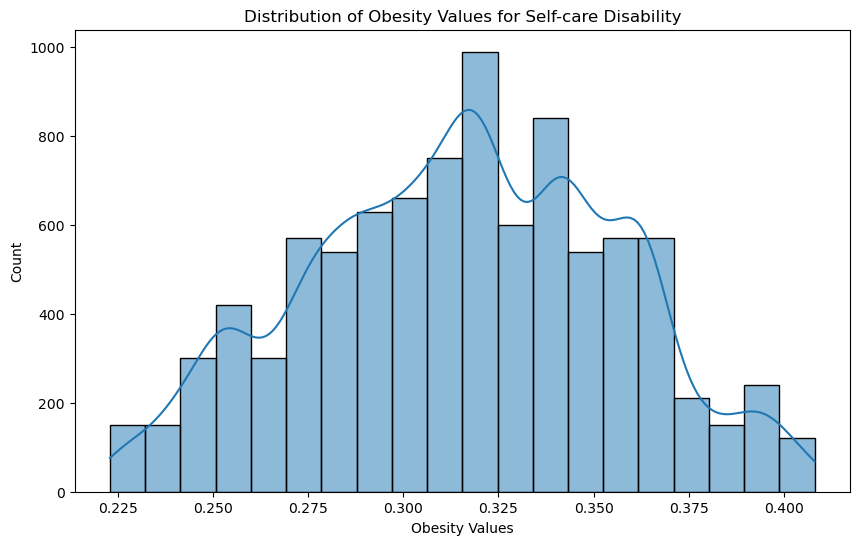

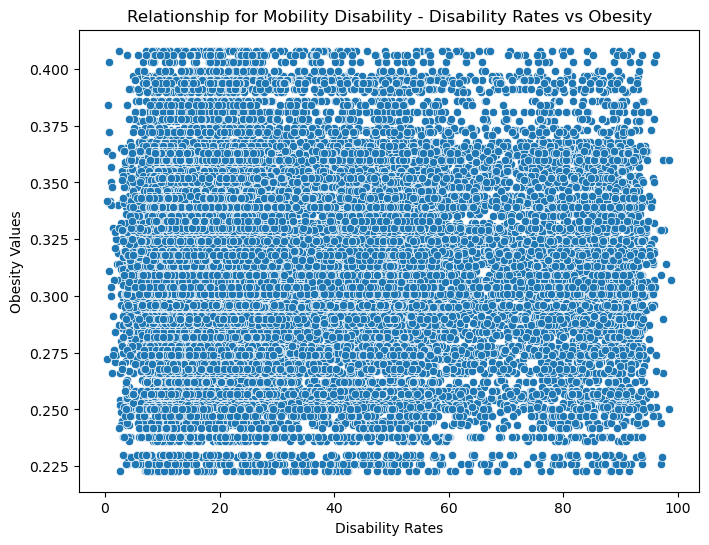

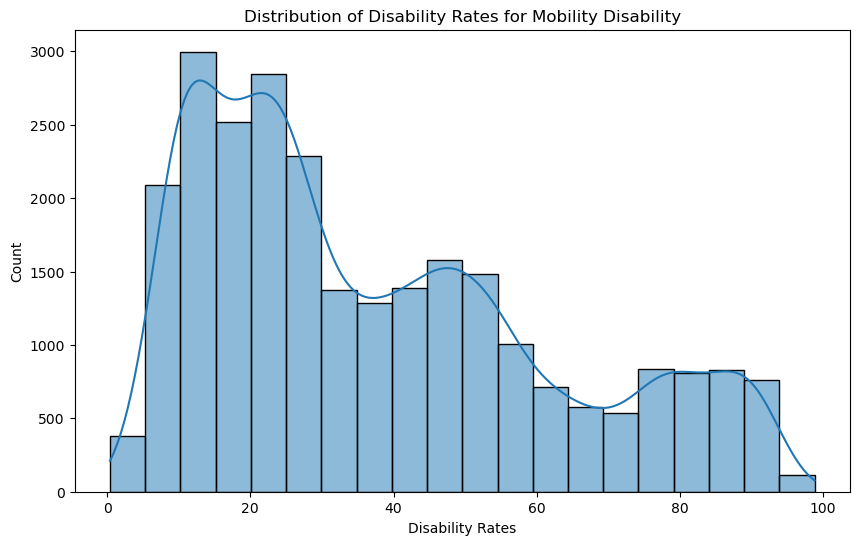

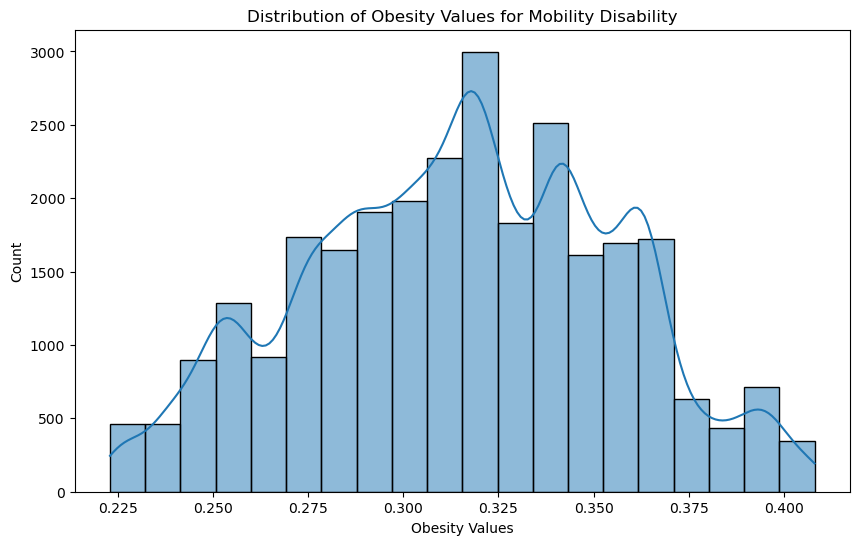

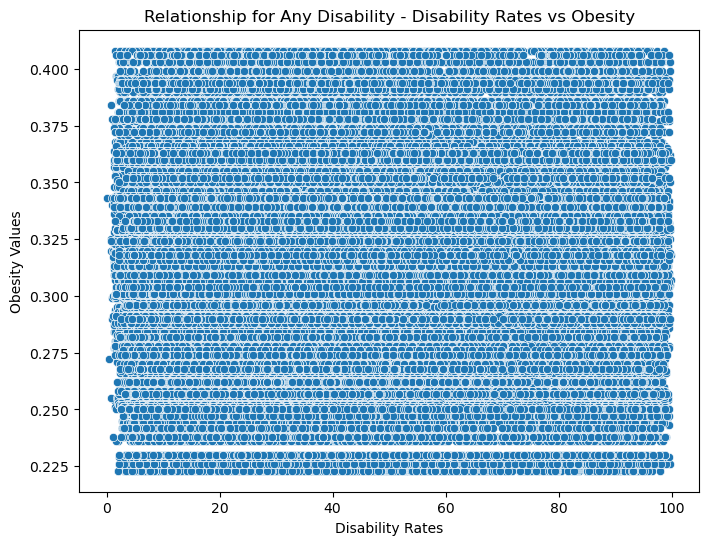

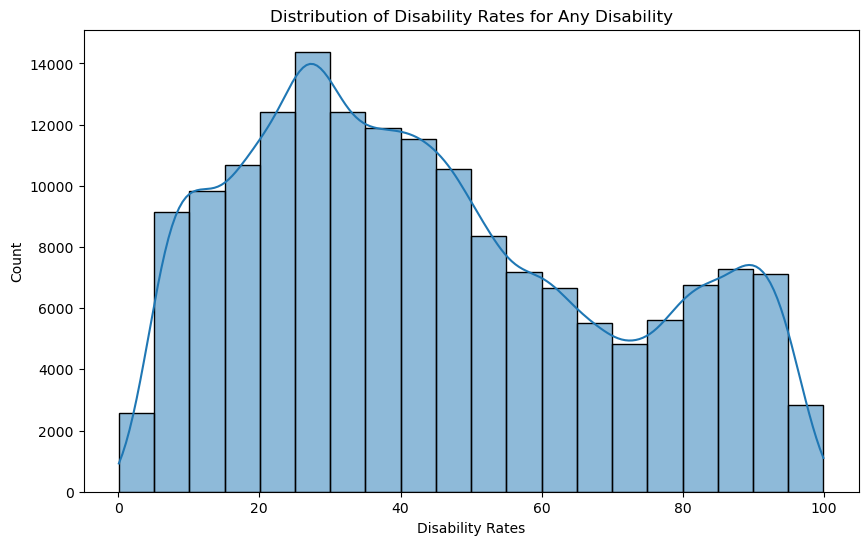

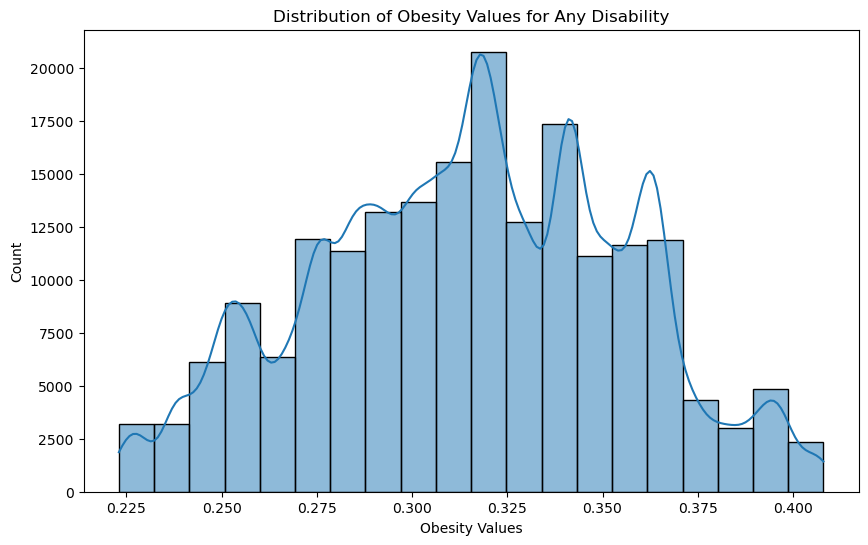

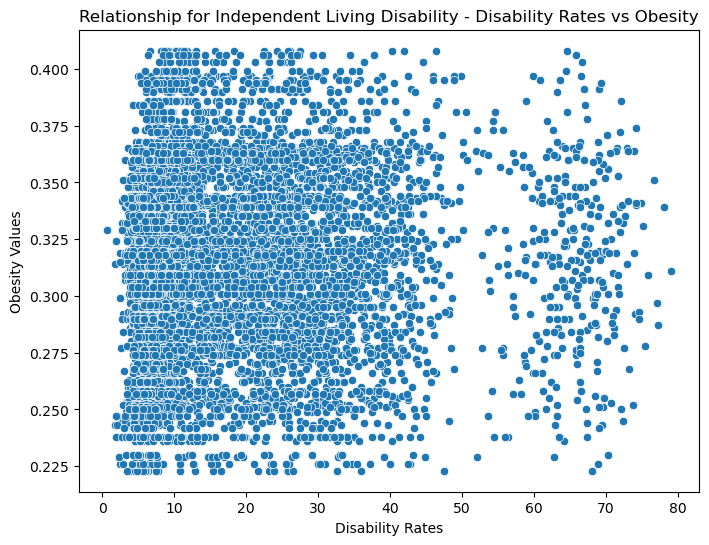

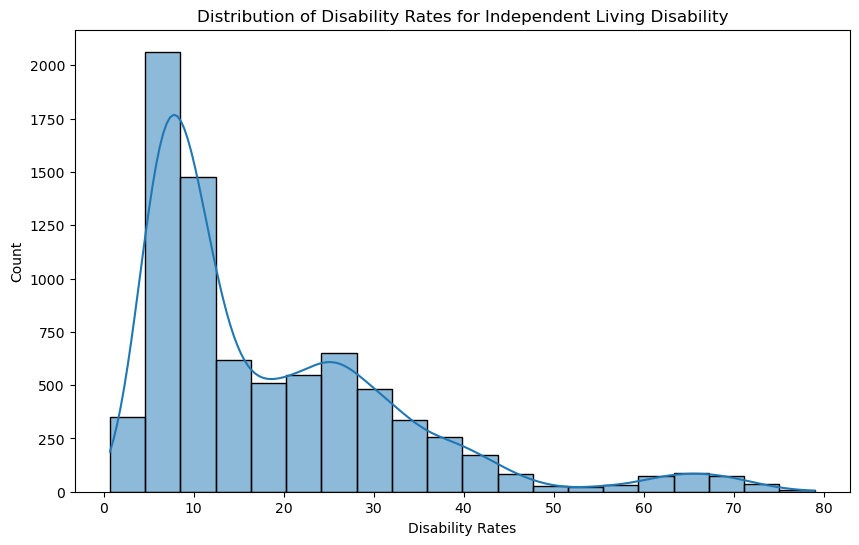

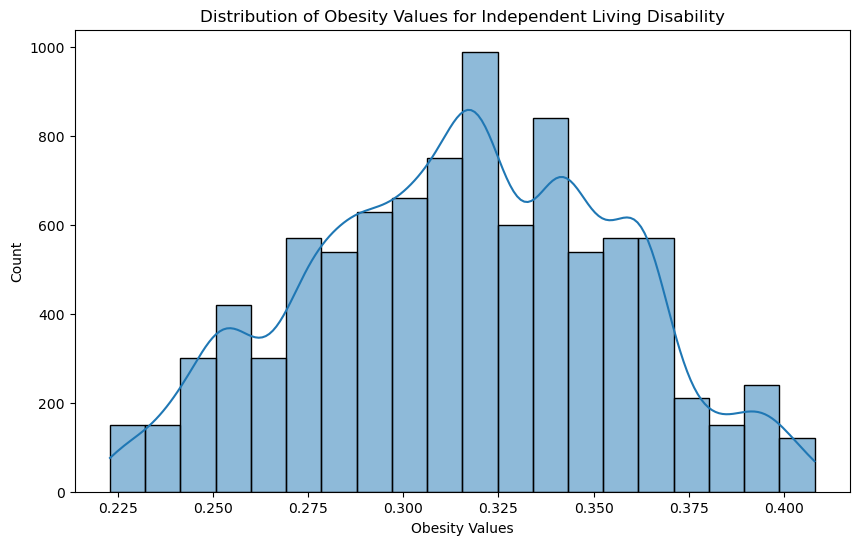

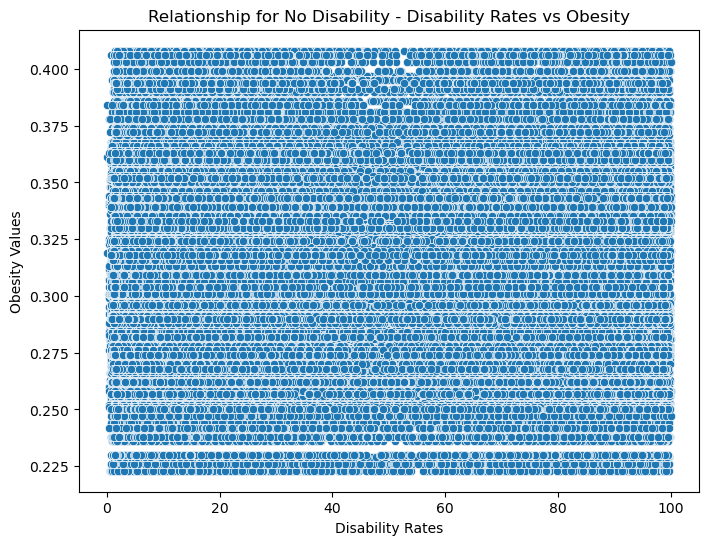

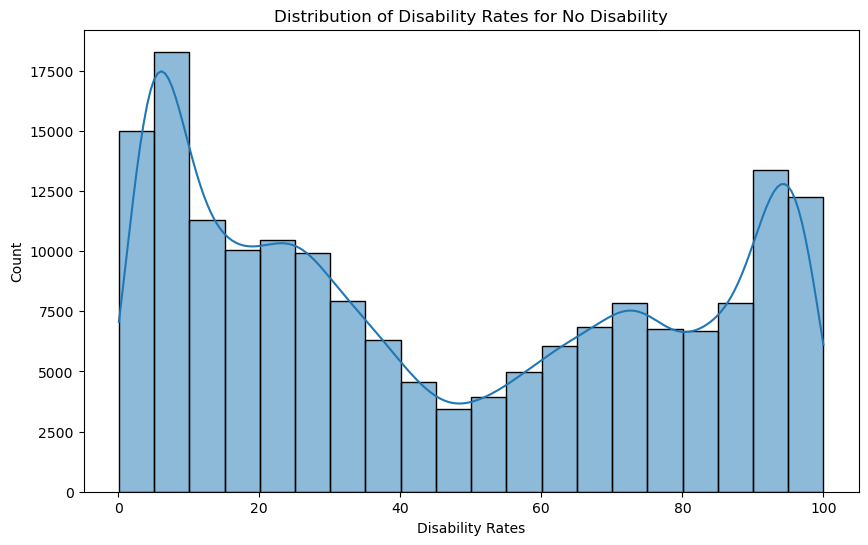

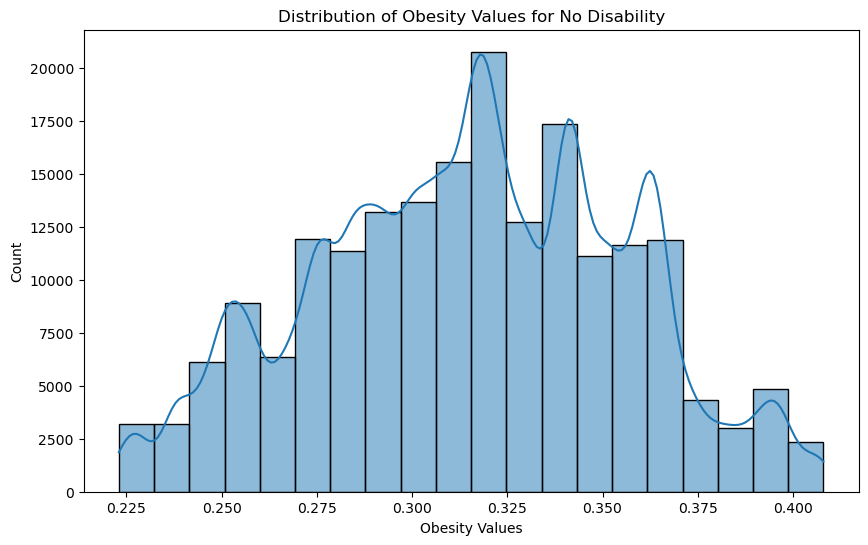

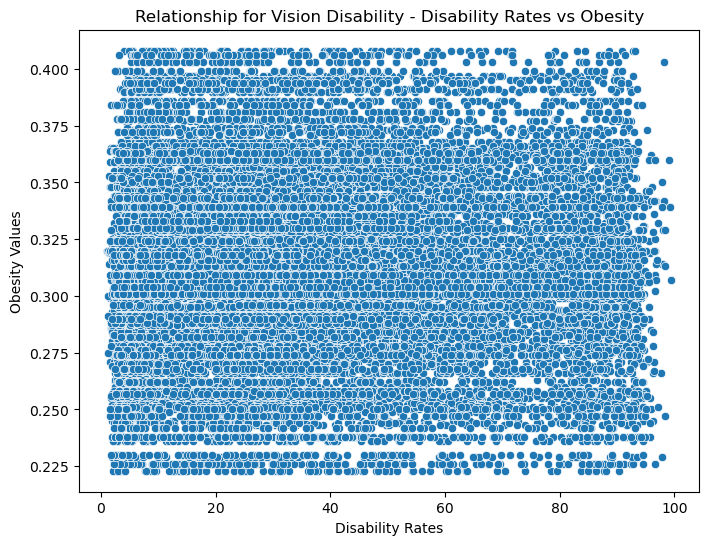

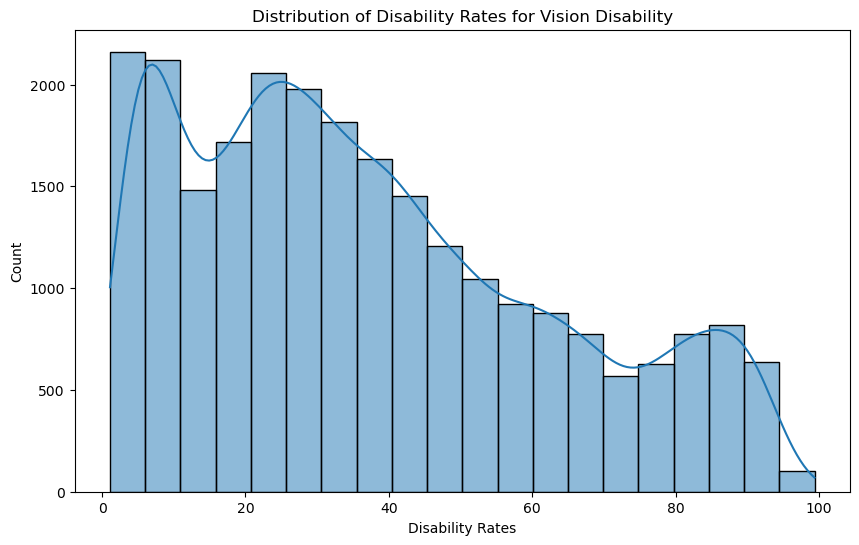

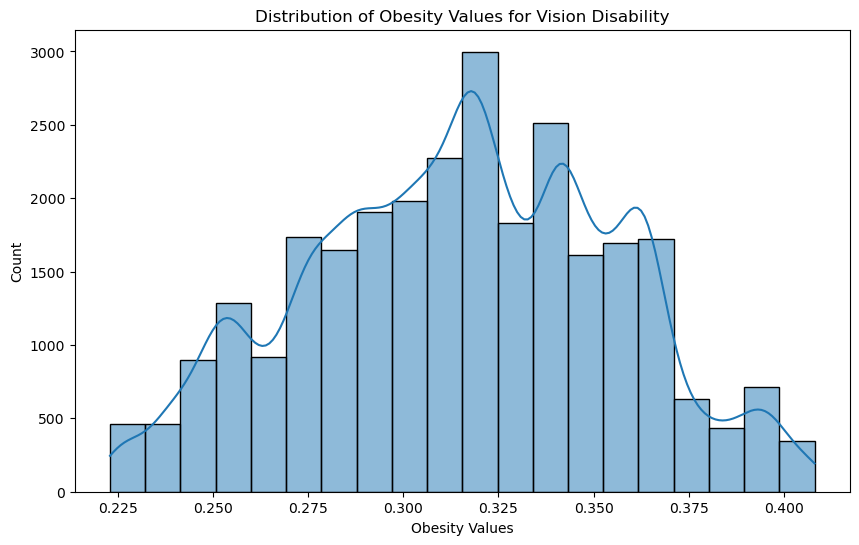

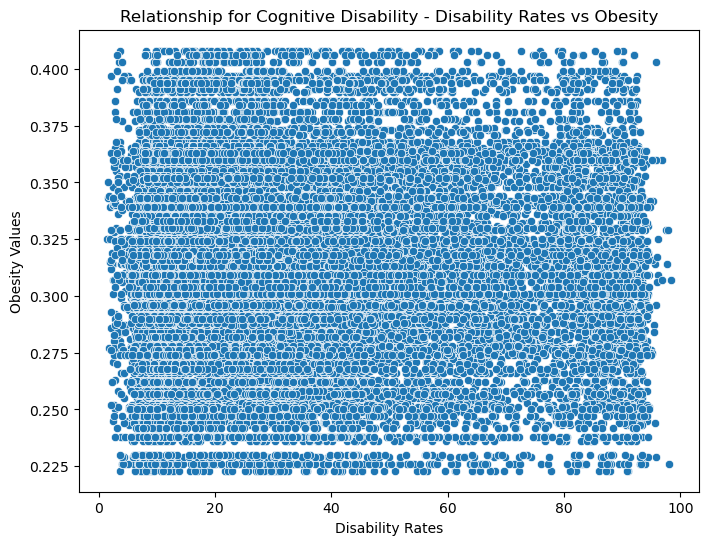

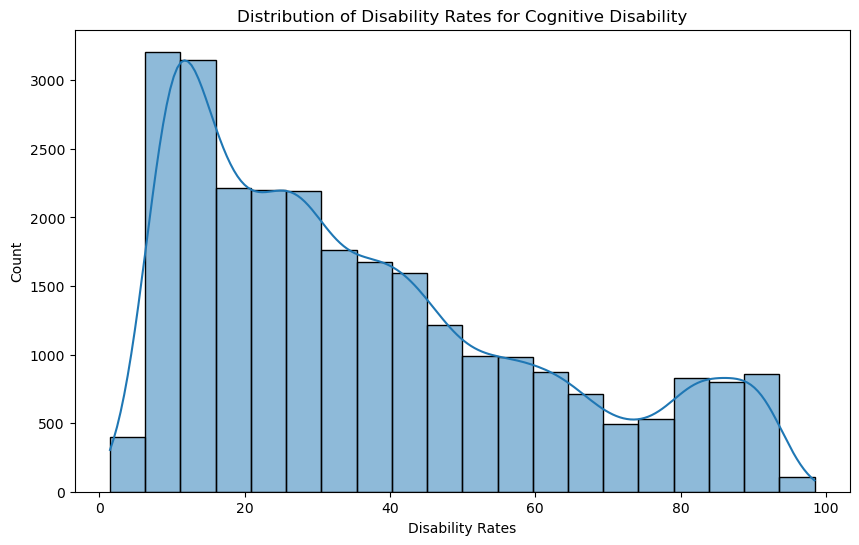

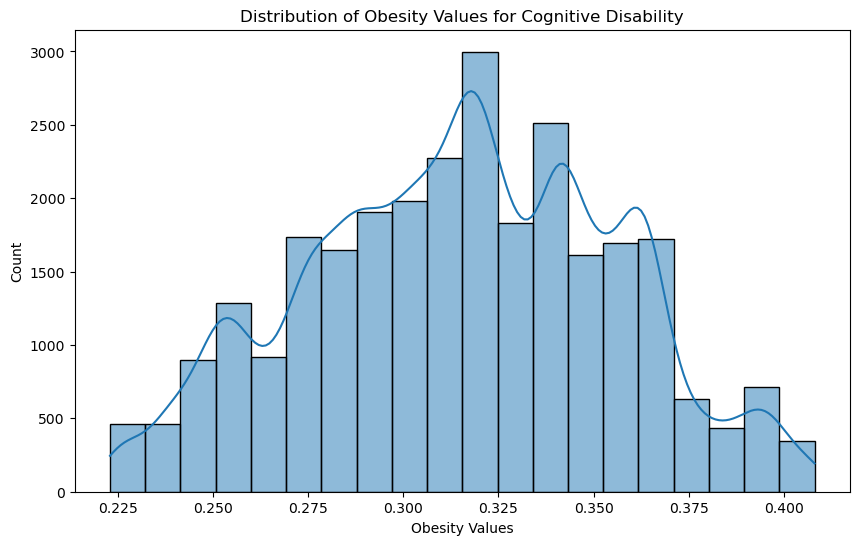

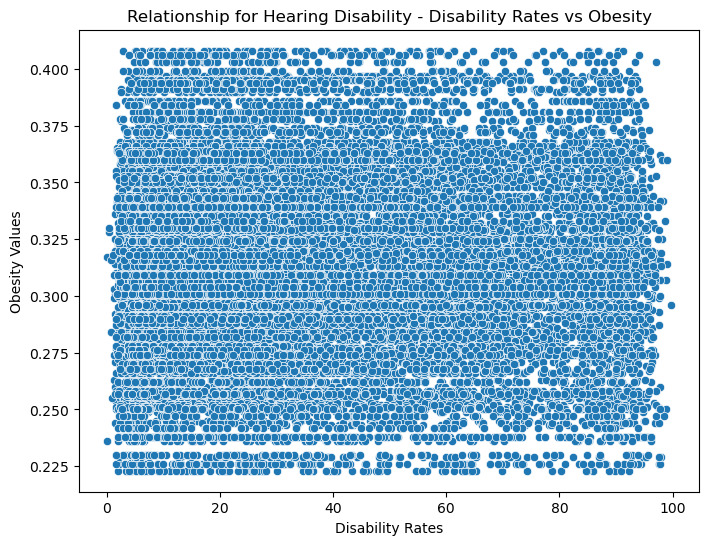

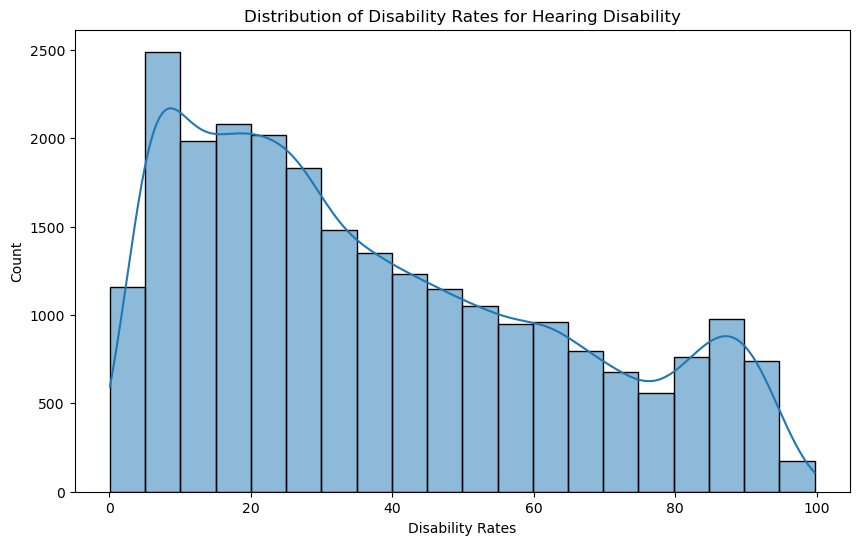

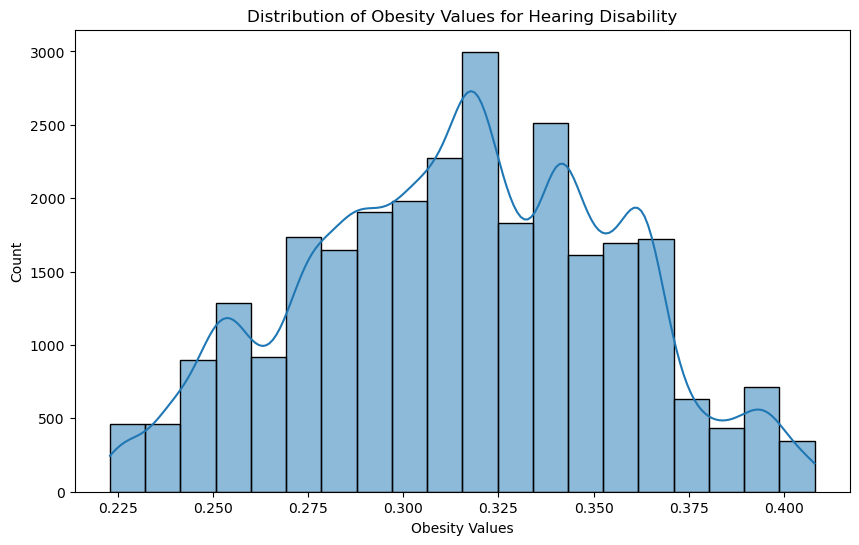

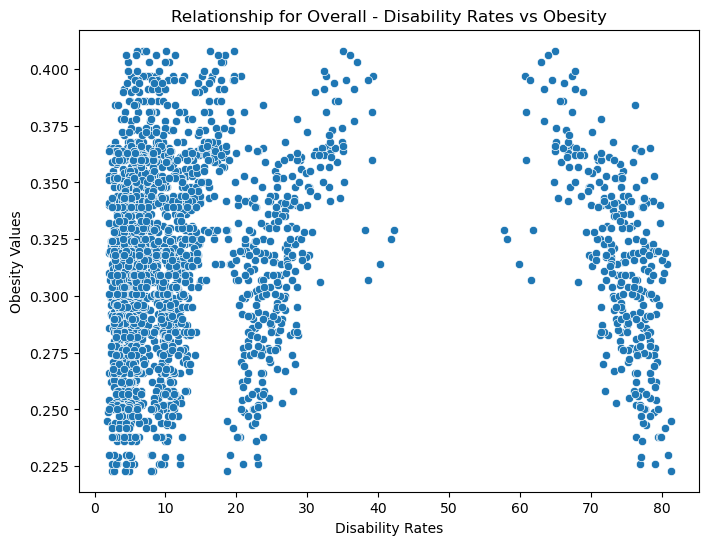

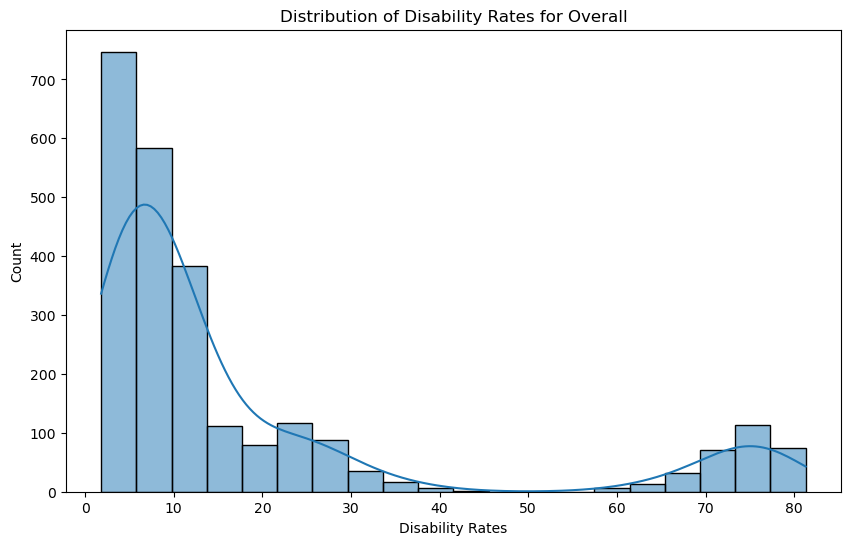

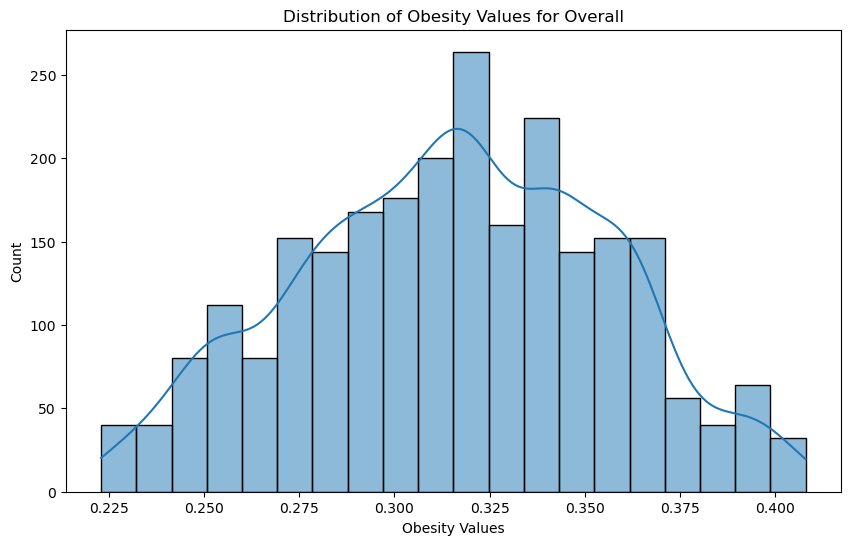

In [9]:
# Visualize relationships for each disability type
disability_types = data['Stratification1'].unique()

for disability_type in disability_types:
    subset_data = data[data['Stratification1'] == disability_type]
    
    # Visualize the relationship between Disability Data_Value and Obesity Obesity_Value for each disability type
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Data_Value', y='Obesity_Value', data=subset_data)
    plt.title(f'Relationship for {disability_type} - Disability Rates vs Obesity')
    plt.xlabel('Disability Rates')
    plt.ylabel('Obesity Values')
    plt.show()

    # Visualize distributions using histograms for each disability type
    plt.figure(figsize=(10, 6))
    sns.histplot(subset_data['Data_Value'], bins=20, kde=True)
    plt.title(f'Distribution of Disability Rates for {disability_type}')
    plt.xlabel('Disability Rates')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.histplot(subset_data['Obesity_Value'], bins=20, kde=True)
    plt.title(f'Distribution of Obesity Values for {disability_type}')
    plt.xlabel('Obesity Values')
    plt.show()


# Correlation Analysis for Each Disability Type

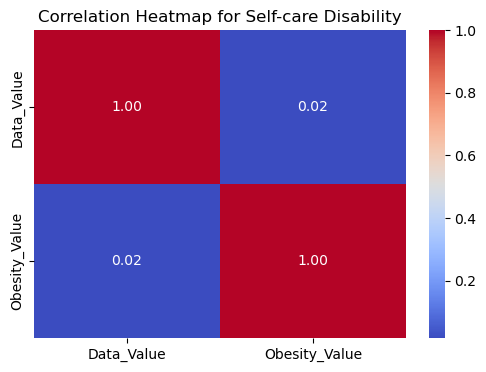

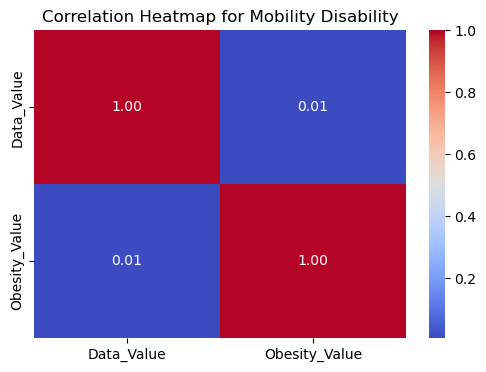

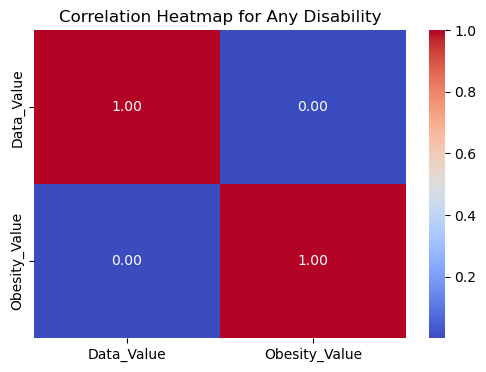

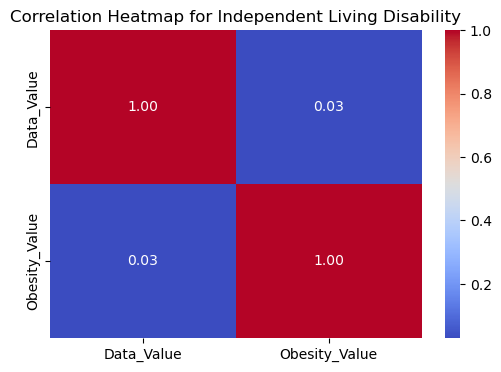

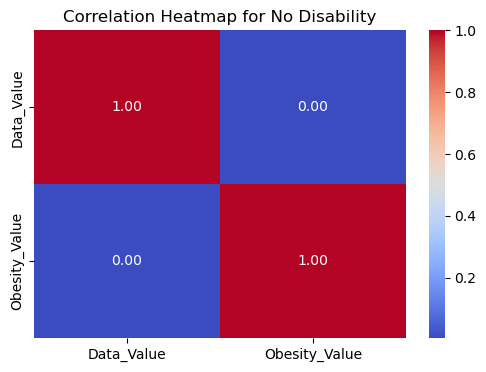

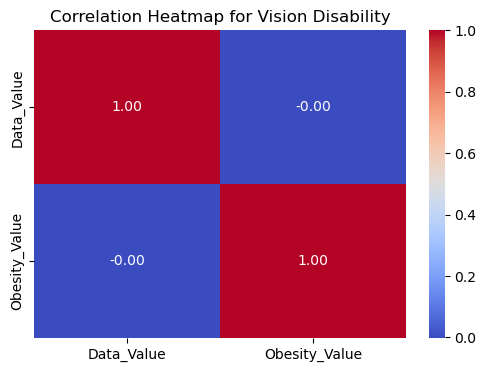

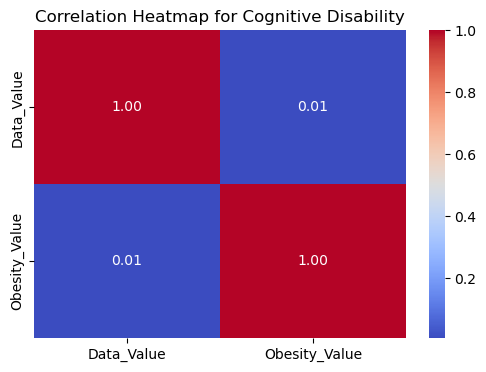

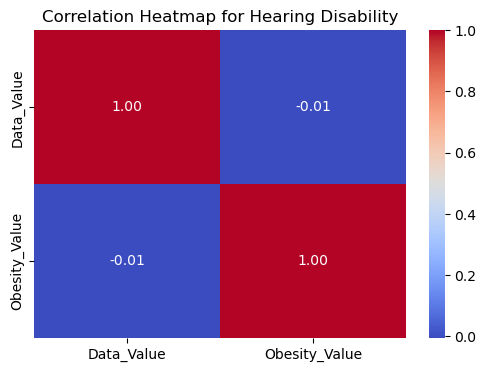

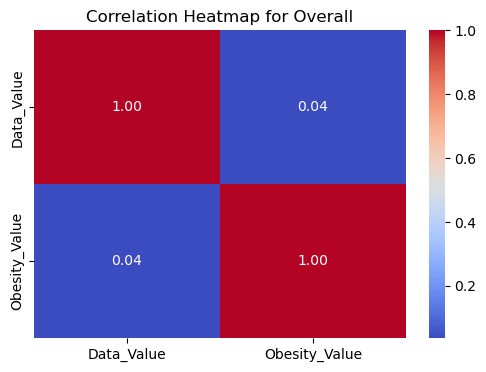

In [10]:
# Correlation heatmap for each disability type
for disability_type in disability_types:
    subset_data = data[data['Stratification1'] == disability_type]
    correlation_matrix = subset_data[['Data_Value', 'Obesity_Value']].corr()
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Correlation Heatmap for {disability_type}')
    plt.show()


# Visualize Relationships for All Disability Types

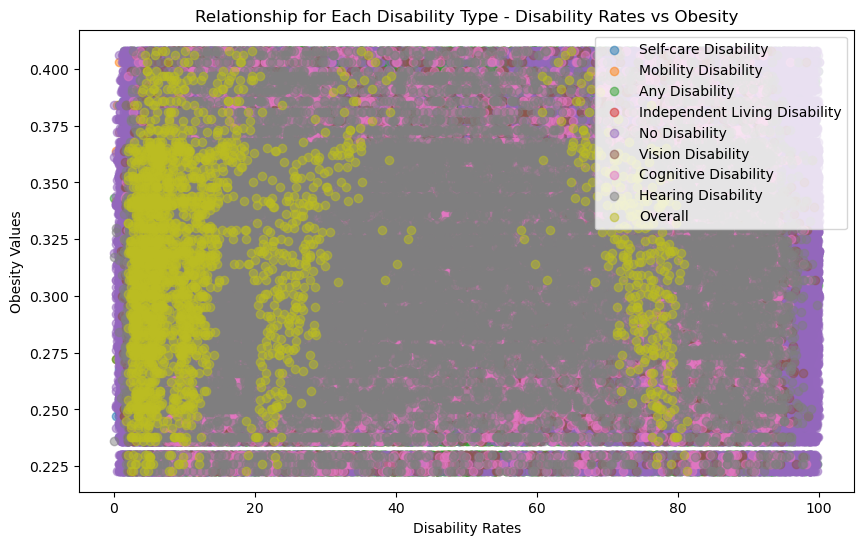

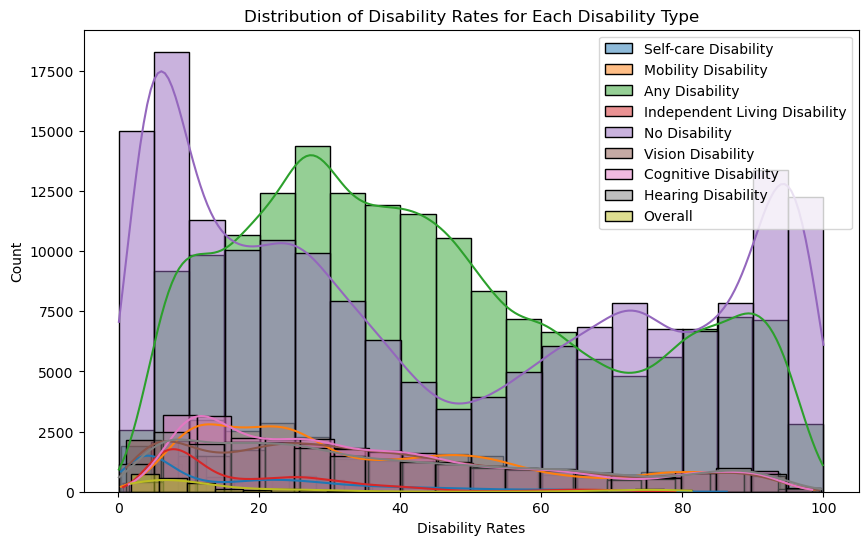

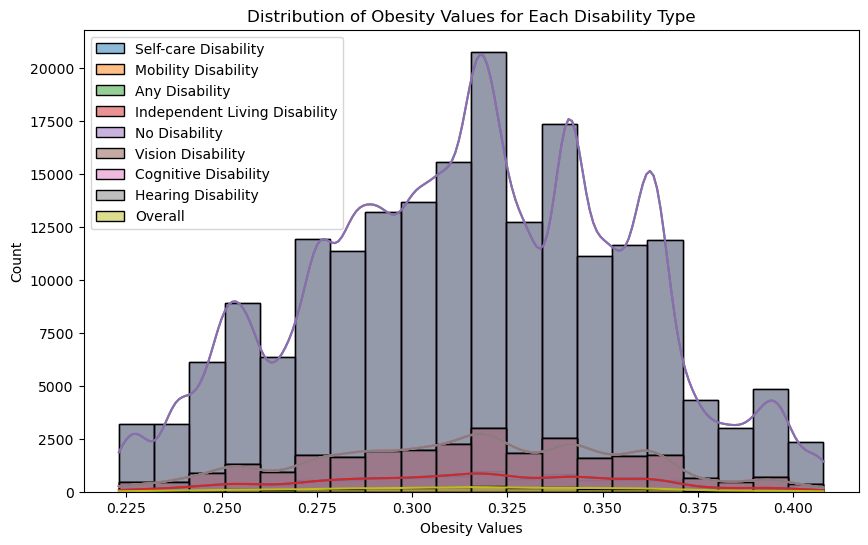

In [11]:
# Visualize relationships for all disability types
plt.figure(figsize=(10, 6))
for disability_type in data['Stratification1'].unique():
    subset_data = data[data['Stratification1'] == disability_type]
    plt.scatter(subset_data['Data_Value'], subset_data['Obesity_Value'], label=disability_type, alpha=0.5)

plt.title('Relationship for Each Disability Type - Disability Rates vs Obesity')
plt.xlabel('Disability Rates')
plt.ylabel('Obesity Values')
plt.legend()
plt.show()

# Visualize distributions using histograms for all disability types
plt.figure(figsize=(10, 6))
for disability_type in data['Stratification1'].unique():
    subset_data = data[data['Stratification1'] == disability_type]
    sns.histplot(subset_data['Data_Value'], bins=20, kde=True, label=disability_type, alpha=0.5)

plt.title('Distribution of Disability Rates for Each Disability Type')
plt.xlabel('Disability Rates')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
for disability_type in data['Stratification1'].unique():
    subset_data = data[data['Stratification1'] == disability_type]
    sns.histplot(subset_data['Obesity_Value'], bins=20, kde=True, label=disability_type, alpha=0.5)

plt.title('Distribution of Obesity Values for Each Disability Type')
plt.xlabel('Obesity Values')
plt.legend()
plt.show()


# Correlation Analysis for All Disability Types

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


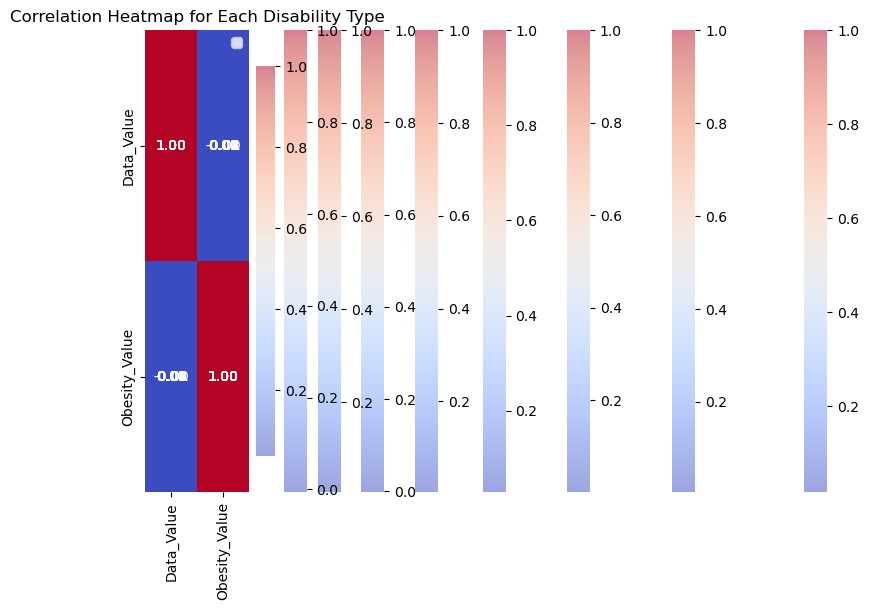

In [12]:
# Correlation heatmap for all disability types
plt.figure(figsize=(10, 6))
for disability_type in data['Stratification1'].unique():
    subset_data = data[data['Stratification1'] == disability_type]
    correlation_matrix = subset_data[['Data_Value', 'Obesity_Value']].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', label=disability_type, alpha=0.5)

plt.title('Correlation Heatmap for Each Disability Type')
plt.legend()
plt.show()


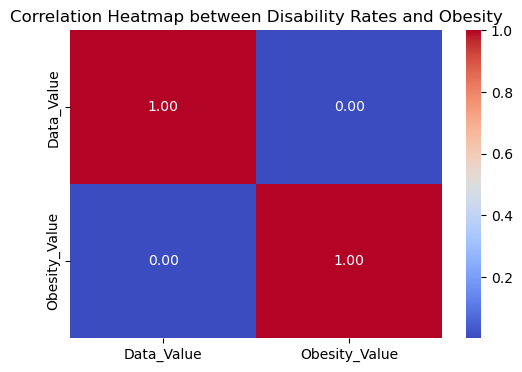

In [16]:
# Calculate correlation between Disability Rates and Obesity Values
correlation_matrix = data[['Data_Value', 'Obesity_Value']].corr()

# Display correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap between Disability Rates and Obesity')
plt.show()


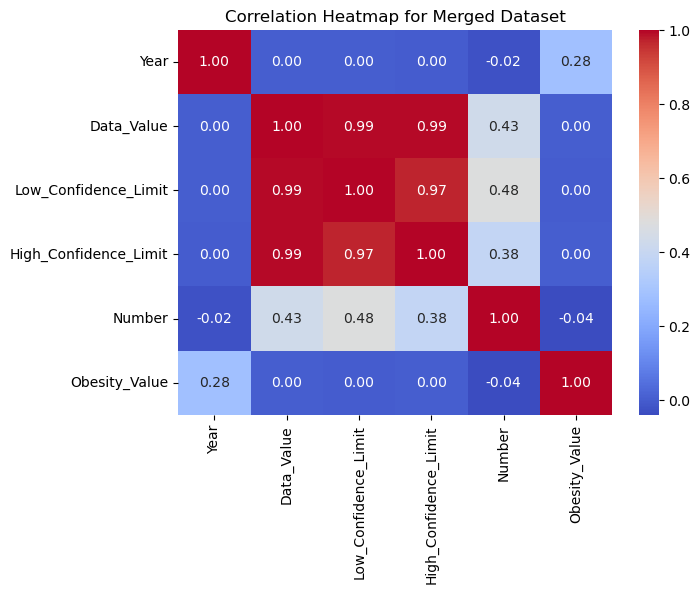

In [23]:
# Select only numeric columns
numeric_data = data.select_dtypes(include='number')

# Define columns to exclude from correlation analysis
columns_to_exclude = ['Data_Value_Alt', 'WeightedNumber', 'Unnamed: 0','LocationID']  # Replace with columns you want to exclude

# Select only numeric columns excluding the specified columns
numeric_data = data.select_dtypes(include='number').drop(columns=columns_to_exclude, errors='ignore')

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Display correlation heatmap
plt.figure(figsize=(7,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Merged Dataset')
plt.show()

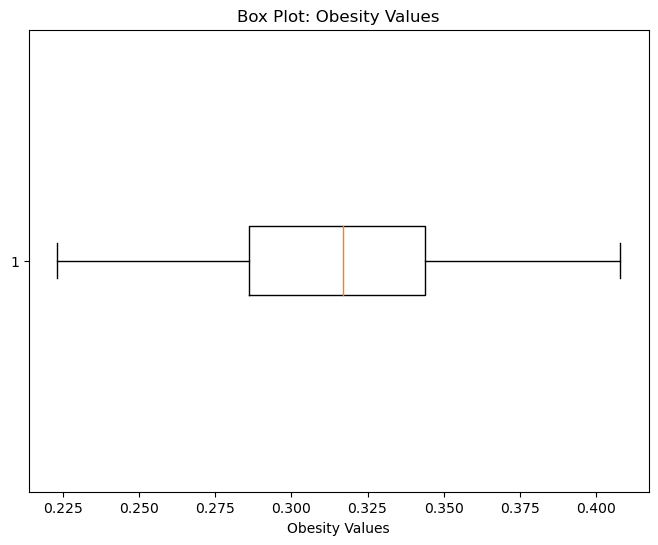

In [31]:
# Box plot for Obesity_Value
plt.figure(figsize=(8, 6))
plt.boxplot(data['Obesity_Value'].dropna(), vert=False)
plt.title('Box Plot: Obesity Values')
plt.xlabel('Obesity Values')
plt.show()

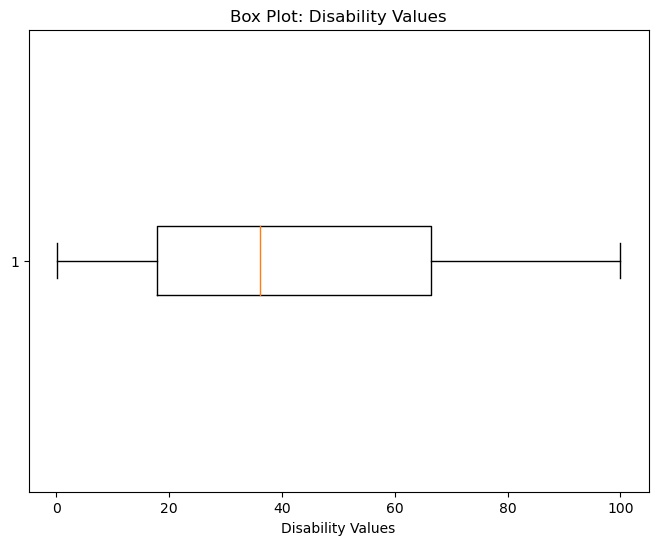

In [33]:
# Box plot for Disability_Value
plt.figure(figsize=(8, 6))
plt.boxplot(data['Data_Value'].dropna(), vert=False)
plt.title('Box Plot: Disability Values')
plt.xlabel('Disability Values')
plt.show()

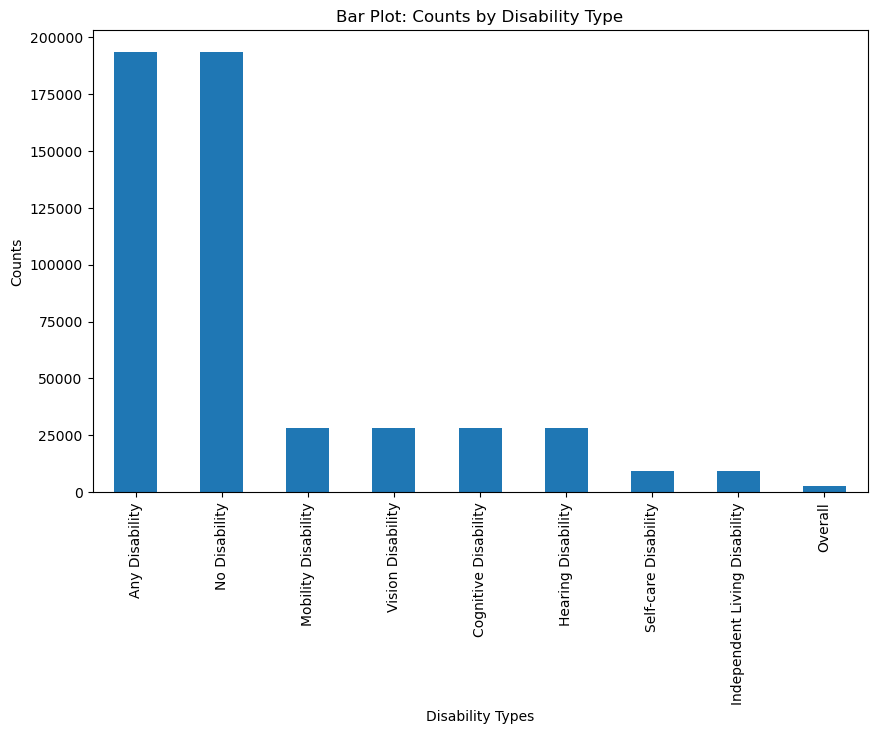

In [32]:
# Bar plot for Stratification1 (a categorical variable)
plt.figure(figsize=(10, 6))
data['Stratification1'].value_counts().plot(kind='bar')
plt.title('Bar Plot: Counts by Disability Type')
plt.xlabel('Disability Types')
plt.ylabel('Counts')
plt.show()